
# Unit 2: Topics

What will you learn with this unit?

> 1. ROS **topics** and how to manage them
2. **Publisher** and how to create one
3. **Topic messages** and how they work


# Part 1: Publisher


## **Example 2.1**

**Python Program {2.1}: simple_topic_publisher.py**

[ROS Message Types](http://wiki.ros.org/std_msgs)   Package Summary

check for 
> **ROS Message Types**

In [ ]:
#! /usr/bin/env python

import rospy

from std_msgs.msg import Int32          # from PACKAGE_NAME import MESSAGE_TYPE    # File:
rost  r
rospy.init_node('topic_publisher')         # Node name  

pub = rospy.Publisher('/counter', Int32, queue_size=1)     # Publisher description


rate = rospy.Rate(2)                       # Rate object of 2Hz
count = Int32()                            # Type: std_msgs/Int32
count.data = 0                             # int32 data

while not rospy.is_shutdown():             # Endless loop 
  pub.publish(count)
  count.data += 1
  rate.sleep()                              # sleep 

**Nodes use topics to publish information for other nodes** so that they can communicate.

> You can find out, at any time, the number of topics in the system by doing a **rostopic list**. 
> * You can also check for a specific topic.

In [ ]:
# filter 
rostopic list | grep  '/counter'

In [ ]:
# user ~ $ rostopic list | grep '/counter'

/counter

You can request information about a topic by doing **rostopic info**  
    < name_of_topic >

In [ ]:
rostopic info /counter

In [ ]:
user ~ $ rostopic info /counter
Type: std_msgs/Int32

Publishers:
 * /topic_publisher (http://ip-172-31-16-133:47971/)

Subscribers: None

The output indicates the type of information published 
> * **(std_msgs/Int32)**, the node that is publishing this information
> * **(/topic_publisher)**, and if there is a node listening to that info (None in this case).

In [ ]:
rostopic echo /counter

# count.data += 1

data:
985
---
data:
986
---
data:
987
---
data:
988

In [ ]:
#! /usr/bin/env python

import rospy                               # Import the Python library for ROS
from std_msgs.msg import Int32             # Import the Int32 message from the std_msgs package

rospy.init_node('topic_publisher')         # Initiate a Node named 'topic_publisher'

                      # Creating  Publisher  Topic  
pub = rospy.Publisher('/counter', Int32, queue_size=1)    
                                           # 1. Create a Publisher object, 
                                           # 2. that will publish on the /counter topic
                                           # 3. messages of type Int32
                     # intialize Publisher 

rate = rospy.Rate(2)                       # Set a publish rate of 2 Hz
count = Int32()                            # Create a var of type Int32
count.data = 0                             # Initialize 'count' variable

while not rospy.is_shutdown():             # Create a loop that will go until someone stops the program execution

  pub.publish(count)                       # Publish the message within the 'count' variable
  count.data += 1                          # Increment 'count' variable
  rate.sleep()                             # Make sure the publish rate maintains at 2 Hz

* **A publisher is a node that keeps publishing a message into a topic**. So now... what's a topic?

* **A topic is a channel that acts as a pipe, where other ROS nodes can either publish or read information**. 
> Let's now see some commands related to topics (some of them you've already used).

 In this case, you **can read just the last message published into a topic** with the next command:

In [ ]:
rostopic echo <topic_name> -n1

To **get information about a certain topic**, use the next command:

In [ ]:
rostopic info <topic_name>

## **Information of Topic**

1. Type 
2. Publisher 
3. Subscribers: None

## **2. Messages**

As you may have noticed, topics handle information through messages. 
> There are many different types of messages.

In the case of the code you executed before, the message type was an **std_msgs/Int32**, but ROS provides a lot of different messages. 
> You can even create your own messages, but it is recommended to use ROS default messages when its possible.

Messages are defined in **.msg files**, which are located inside a **msg** directory of a package.

**To get information about a message,** you use the next command:

In [ ]:
rosmsg show <message>

In [ ]:
rosmsg show std_msgs/Int32

In [ ]:
user ~ $ rosmsg show std_msgs/Int32

/ [std_msgs/Int32]:
int32 data

In this case, the **Int32** message has only one variable named **data** of type **int32**. This Int32 message comes **from** the package std_msgs, and you can find it in its **msg** directory. If you want, you can have a look at the Int32.msg file by executing the following command:

## **Data for Excercice 2.1**

1. The **/cmd_vel** topic is the topic used to move the robot.
> * Do a **rostopic info /cmd_vel** in order to get information about this topic, and identify the message it uses. 
> * You have to modify the code to use that message.

3. In order to know the structure of the Twist messages,
>  you need to use the **rosmsg show command**, with the type of the message used by the topic /cmd_vel.

2. In order to fill the Twist message, you need to create an instance of the message. 
> In Python, this is done like this: **var = Twist()**

4 .- In this case, the robot uses a differential drive plugin to move. 
> * That is, the robot can only move linearly in the **x axis, or rotationaly in the angular** z axis.
> * This means that the only values that you need to fill in the Twist message are the **linear x and the angular z**.

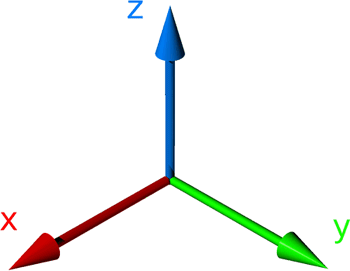

5.- The magnitudes of the Twist message are in m/s, so it is recommended to use values between 0 and 1. For example, 0'5 m/s.

In [ ]:
#! /usr/bin/env python

import rospy
from geometry_msgs.msg import Twist       # msg data 

rospy.init_node('move_robot_node')       # node name

pub = rospy.Publisher('/cmd_vel', Twist, queue_size=1)    # topic publishing 

rate = rospy.Rate(2)
                                                     # Data insitializing 
move = Twist()                                        # 1. Object define to msg

move.linear.x = 0.5 #Move the robot with a linear velocity in the x axis
move.angular.z = 0.5 #Move the with an angular velocity in the z axis

while not rospy.is_shutdown(): 
  pub.publish(move)
  rate.sleep()

In [ ]:
#! /usr/bin/env python

import rospy
from geometry_msgs.msg import Twist 

rospy.init_node('topic_publisher')

pub = rospy.Publisher('/cmd_vel', Twist, queue_size=1)
rate = rospy.Rate(2)
count = Twist()

count.linear.x = 0.5
count.angular.z = 0.5 

while not rospy.is_shutdown(): 
  pub.publish(count)
  rate.sleep()

In [ ]:
rostopic pub  /cmd_vel geometry_msgs/Twist "linear:
  x: 0.0
  y: 0.0
  z: 0.0
angular:
  x: 0.0
  y: 0.0
  z: 0.0"

SyntaxError: ignored